# Logistic Regression

![Concept of Logistic Regression](imgs/logistic-regression-01.PNG)
![Algorithm of Logistic Regression](imgs/logistic-regression-02.PNG)


More details: https://ml-explained.com/blog/logistic-regression-explained

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer, load_iris, load_digits
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# surpress warnings for clean notebook
warnings.filterwarnings('ignore')

Let's use Diagnostic Wisconsin Breast Cancer dataset with logistic regression.

![Breast Cancer dataset info](imgs/breast-cancer-dataset-info.PNG)

In [3]:
cancer_dataset = load_breast_cancer(as_frame=True)
cancer_df = cancer_dataset.frame

display(cancer_df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
print(cancer_df.info())
print(cancer_dataset.target_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
print(cancer_df.isna().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [6]:
X = cancer_dataset.data
y = cancer_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
logistic_reg = LogisticRegression(penalty=None, solver="newton-cg")

logistic_reg.fit(X_train, y_train)

LogisticRegression(penalty=None, solver='newton-cg')

In [8]:
print("Train score:", logistic_reg.score(X_train, y_train))
print("Test score:", logistic_reg.score(X_test, y_test))

Train score: 0.9949748743718593
Test score: 0.9532163742690059


In [9]:
print(classification_report(y_test, logistic_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        63
           1       0.99      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171



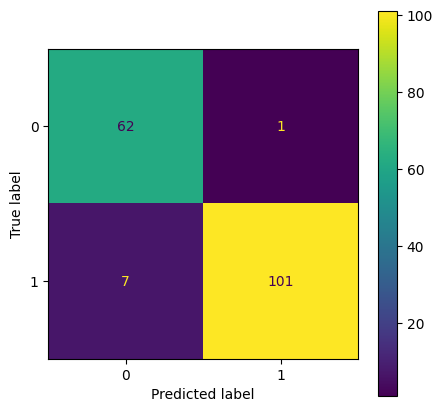

In [10]:
cm = confusion_matrix(y_test, logistic_reg.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.figure_.set_size_inches(w=5, h=5)

Now let's perform hyperparameter tunning.

In [11]:
params = {
    "penalty": ['l2', None],
    "C": np.arange(0, 1.1, 0.1),
    "solver": ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [12]:
grid_search = GridSearchCV(LogisticRegression(), params, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'penalty': ['l2', None],
                         'solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                    'sag', 'saga']})

In [13]:
best_logistic_reg = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)
print("Train score:", best_logistic_reg.score(X_train, y_train))
print("Test score:", best_logistic_reg.score(X_test, y_test))

Best parameters: {'C': 0.30000000000000004, 'penalty': 'l2', 'solver': 'newton-cg'}
Train score: 0.949748743718593
Test score: 0.9649122807017544


## Multiclass Classification

Let's use Iris dataset with logistic regression for multiclass classification.

In [14]:
iris_dataset = load_iris(as_frame=True)
iris_df = iris_dataset.frame

In [15]:
display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
print(iris_df.info())
print(iris_dataset.target_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
['setosa' 'versicolor' 'virginica']


In [17]:
print(iris_df.isna().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [18]:
X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
logistic_reg = LogisticRegression(multi_class='ovr', penalty=None, solver="newton-cg")

logistic_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', penalty=None, solver='newton-cg')

In [20]:
print("Train score:", logistic_reg.score(X_train, y_train))
print("Test score:", logistic_reg.score(X_test, y_test))

Train score: 0.975
Test score: 1.0


In [21]:
print(classification_report(y_test, logistic_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



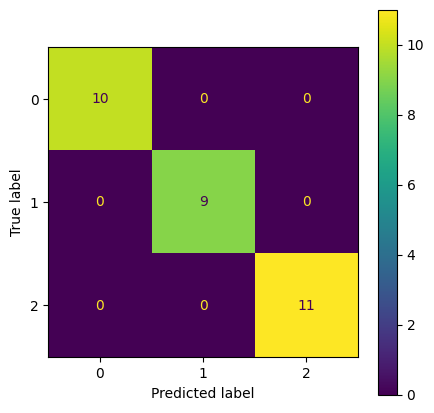

In [22]:
cm = confusion_matrix(y_test, logistic_reg.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.figure_.set_size_inches(w=5, h=5)

Now let's use Digit Dataset in sklearn. This dataset is made up of 1797 8x8 images. Each image is of a hand-written digit.

In [3]:
digits_dataset = load_digits()
print(digits_dataset.images.shape)

(1797, 8, 8)


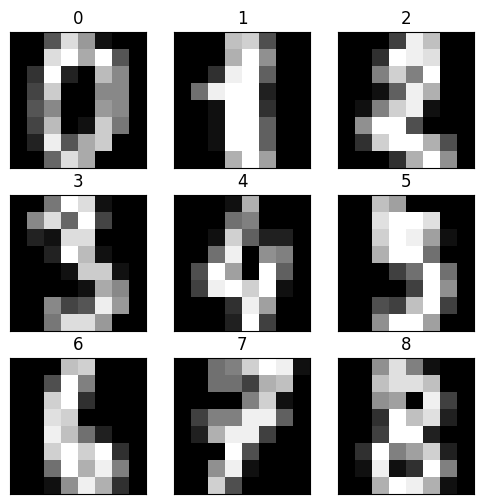

In [4]:
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(digits_dataset.images[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title(digits_dataset.target[i])
plt.show()

In [5]:
print(digits_dataset.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [6]:
X = digits_dataset.data
y = digits_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
logistic_reg = LogisticRegression(multi_class="ovr")

logistic_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [8]:
print("Train score:", logistic_reg.score(X_train, y_train))
print("Test score:", logistic_reg.score(X_test, y_test))

Train score: 0.9960222752585521
Test score: 0.9518518518518518


In [9]:
digit_predict = logistic_reg.predict(X_test)

print(classification_report(y_test, digit_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.91      0.84      0.88        50
           2       0.96      1.00      0.98        47
           3       1.00      0.96      0.98        54
           4       0.98      0.98      0.98        60
           5       0.95      0.92      0.94        66
           6       1.00      0.98      0.99        53
           7       0.98      0.98      0.98        55
           8       0.75      0.95      0.84        43
           9       0.98      0.92      0.95        59

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.96      0.95      0.95       540



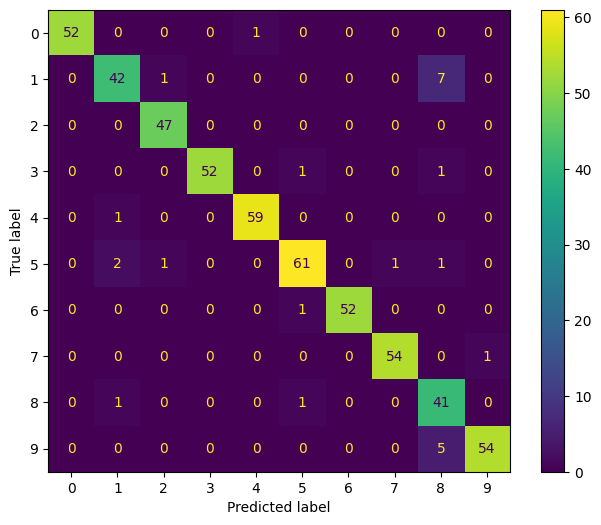

In [10]:
cm = confusion_matrix(y_test, logistic_reg.predict(X_test), labels=digits_dataset.target_names)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.figure_.set_size_inches(w=8, h=6)
